# Promt development
In this python notebook the promt to detect genetic fallacies is being developed and refined using rens wilderoom framework of promt development for social science development. ( https://docs.google.com/document/d/17GMIdOGSOFJAkbbqWiBqJpNTO2NdjJAUCBRZHJUDs3o/edit?usp=sharing)

## Defining genetic fallacies
Genetic fallacies occur in political speech when arguments or ideas are **accepted** or **dismissed** soley based on their origin rather then content. (https://www.perplexity.ai/search/what-are-genetic-fallacies-in-B1c5Gqr5TyCSCsSpNfM70g)

There are many subcategories including ad hominem, appeal to false authority etc.(https://finmasters.com/genetic-fallacy/)

## Potential challanges 
- context dependency: fallacies might be not just reuslt from the use of language but context dependent. An llm might have inconsistend performance to make sense of the context across different subjects.
- Language: As our data is in dutch, we might face the issue that most opensource llm's are not primarily build to handle langues like dutch.

## Promt

In [8]:
promt = """ You are an expert in analyzing political texts. Analyze the text below for genetic fallacies.

VERY IMPORTANT - OUTPUT RULES:
- Return EXACTLY ONE JSON object.
- NO additional text before or after the JSON.
- NO code markers (```)
- NO repetition of the same analysis.
- NO explanations outside the JSON.

CONTENT RULES:
- Report ONLY the clearest cases (confidence ≥ 0.7).
- DO NOT report weak or questionable cases.
- Focus on UNIQUE cases (not the same statement multiple times).
- Maximum of 5 cases per analysis. 

Definitions of genetic fallacies:
The genetic fallacy is a fallacy of irrelevance in which arguments or information are dismissed or validated based solely on their source of origin rather than their content.In other words, a claim is ignored or given credibility based on its source rather than the claim itself.

Examples of genetic fallacies: 
  - "MISSING"    
  - "MISSING"   


What is NOT a genetic fallacy:
- Insert name for common type of misclassifed fallacy
  Example: "MISSING"    
- Insert name for common type of misclassifed fallacy
  Example: "MISSING"   
  

Confidence Score Guidelines:
- 0.9 - 1.0: Unmistakable delegitimization with clear evidence.  
- 0.7 - 0.9: Clear delegitimization with good context.  
- <0.7: DO NOT REPORT.  

Return the following JSON format:
{{
  "found_fallacy": [
    {{
      "quote": "string (exact quote)",
      "explanation": "string (short justification)",
      "confidence": "float (only ≥ 0.7)",
      "context": "string (relevant context)"
    }}
  ],
  "summary": {{
    "count": "integer",
    "average_confidence": "float",
    "highest_confidence": "float",
    "lowest_confidence": "float"
  }}
}}

If no genetic fallacies with high confidence are found:
{{
  "found_fallacy": [],
  "summary": {{
    "count": 0,
    "average_confidence": 0.0,
    "highest_confidence": 0.0,
    "lowest_confidence": 0.0
  }}
}}

Text to be analyzed:
  {text} """

## Evaluation data set
Source for the 
https://helpfulprofessor.com/genetic-fallacy-examples/

In [9]:
import pandas as pd

fallacy_data = [
    {
        "category": "Appeal to False Authority",
        "text": "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it relies on a celebrity endorsement, which is irrelevant to the diet's effectiveness."
    },
    {
        "category": "Appeal to False Authority",
        "text": "This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by basing the claim on relevant expertise and scientific testing."
    },
    {
        "category": "Stereotyping",
        "text": "All pit bulls are dangerous because I heard about some pit bull attacks on the news.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it generalizes an entire breed based on limited information."
    },
    {
        "category": "Stereotyping",
        "text": "Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks. However, individual temperament and upbringing play significant roles in a dog's behavior.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging reported incidents but also considering other factors influencing dog behavior."
    },
    {
        "category": "Prejudice-Based Dismissal",
        "text": "I won't consider this young candidate's policy proposals because they're too inexperienced to understand complex political issues.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it dismisses ideas based on the person's age rather than the content of their proposals."
    },
    {
        "category": "Prejudice-Based Dismissal",
        "text": "I'll evaluate this young candidate's policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate's age.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by focusing on the content of the proposals rather than the candidate's age."
    },
    {
        "category": "Source Bias",
        "text": "This article criticizing the company's environmental practices can't be trusted because it was written by a former employee.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it dismisses information solely based on its source without considering the content."
    },
    {
        "category": "Source Bias",
        "text": "This article criticizing the company's environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging the source's potential insights while advocating for additional verification."
    },
    {
        "category": "Appeal to Tradition",
        "text": "We've always done our accounting this way, so there's no need to switch to new software systems.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it assumes superiority based on longevity of use rather than effectiveness."
    },
    {
        "category": "Appeal to Tradition",
        "text": "Let's compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by proposing an objective comparison of methods based on current effectiveness."
    },
    {
        "category": "Cultural Stereotypes",
        "text": "She's from Italy, so she must be an excellent cook.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it assumes skill based on nationality without any evidence."
    },
    {
        "category": "Cultural Stereotypes",
        "text": "She's from Italy, which has a rich culinary tradition. It would be interesting to learn if she has any favorite Italian recipes or cooking techniques.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging cultural context without making assumptions about individual abilities."
    }
]

fallacy_df = pd.DataFrame(fallacy_data)


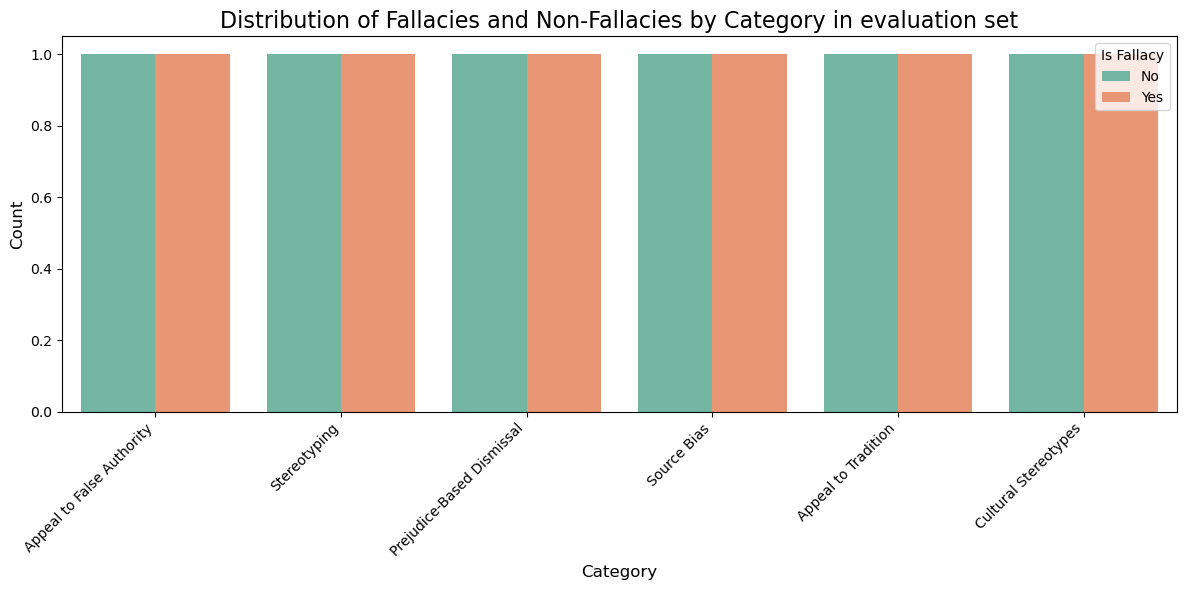

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already created the fallacy_df as in the previous example
df = fallacy_df
df['is_fallacy'] = df['is_fallacy'].astype(int)

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='is_fallacy', palette="Set2")

# Customize the plot
plt.title('Distribution of Fallacies and Non-Fallacies by Category in evaluation set', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fallacy', labels=['No', 'Yes'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# LLM test

In [5]:
pip install ollama

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.20.1
    Uninstalling pydantic_core-2.20.1:
      Successfully uninstalled pydantic_core-2.20.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2
Note: you may need to restart the kernel to use updated packages.


In [14]:
from ollama import chat

model = "deepseek-r1:8b"
fallacy_df["result"] = ""
for i in range (len(fallacy_df)):
    text = fallacy_df["text"][i]
    display(text)
    formated_promt = promt.format(text=text)
    messages = [
            {
                "role": "user",
                "content": formated_promt
            }
        ]

    response = chat(model, messages = messages)['message']['content']
    display(response)
    fallacy_df["result"][i] = response


'The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.'

'<think>\nOkay, so I\'m trying to figure out if the given text contains a genetic fallacy. The text is: "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy." \n\nFirst, I need to recall what a genetic fallacy is. From the definitions provided, a genetic fallacy occurs when arguments or information are dismissed or validated based solely on their source of origin rather than their content. So, the key here is that the argument\'s validity is determined by who is saying it, not the actual claim itself.\n\nLooking at the example provided, someone mentioned Tom Cruise endorsing a diet plan as evidence of its effectiveness and healthiness. The reasoning here seems to be that because Tom Cruise is famous, his endorsement holds weight. \n\nI should check if this fits into a genetic fallacy. The user also gave some examples but didn\'t specify the exact terms they wanted beyond "MISSING." So I need to identify which type of fallacy this is.\n\nWait, in

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

'This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy.'

'<think>\nAlright, I need to analyze the given text for genetic fallacies. The user provided a specific structure for the JSON output, so I should make sure to follow that closely.\n\nFirst, I\'ll read through the text again: "This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy." \n\nThe task is to identify genetic fallacies. Genetic fallacy occurs when arguments or claims are dismissed or validated based on their source rather than their content.\n\nLooking at the sentence, it mentions that the diet plan was clinically tested and approved by registered dietitians. This seems to imply credibility because of the source—registered professionals. However, the user wants us to find cases where claims are based on the source rather than the content. \n\nWait a minute, does that make this a genetic fallacy? The sentence is stating facts about the testing and approval, not dismissing or validating a claim based solely

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

'All pit bulls are dangerous because I heard about some pit bull attacks on the news.'

'<think>\nAlright, so I need to analyze the given text for genetic fallacies. The user provided a specific structure and rules, so I should follow them carefully.\n\nFirst, the text is: "All pit bulls are dangerous because I heard about some pit bull attacks on the news." My task is to identify if there\'s a genetic fallacy here.\n\nI remember that genetic fallacy occurs when someone dismisses or validates an argument based on its source rather than its content. In this case, the argument relies on personal experience of hearing about attacks on the news. The person isn\'t talking about the inherent qualities of pit bulls but instead is using their own knowledge from media reports.\n\nSo, looking at the structure: The conclusion is that all pit bulls are dangerous because of some attacks reported on the news. This seems to dismiss other possible reasons for pit bull behavior beyond what\'s reported in the media. It’s focusing solely on the source (news) rather than the content of pit b

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks. However, individual temperament and upbringing play significant roles in a dog's behavior."

'<think>\nAlright, I need to analyze the given text for genetic fallacies. First, let me recall what genetic fallacy is: it\'s when arguments are dismissed or validated based on their source rather than their content.\n\nLooking at the text: "Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks." The user then says individual temperament and upbringing play significant roles in a dog\'s behavior.\n\nHmm, so the first statement is citing reported attacks to argue that pit bulls are dangerous. But does it specify the source of these reports? If it just says "reported attacks" without providing context or verifying the sources, then it might be using an unsystematic collection of anecdotes as evidence, which could be a genetic fallacy because it\'s relying on unverified sources.\n\nNext part: "However, individual temperament and upbringing play significant roles in a dog\'s behavior." This is contrasting the breed\'s potential dangers wit

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"I won't consider this young candidate's policy proposals because they're too inexperienced to understand complex political issues."

'<think>\nOkay, so I need to analyze the given text for genetic fallacies. Let me start by understanding what a genetic fallacy is. From the definition provided, it\'s when arguments or information are dismissed based on their source rather than their content. So, the focus should be on whether the argument is being validated or dismissed because of who said it or where it came from, not the actual content.\n\nLooking at the text: "I won\'t consider this young candidate\'s policy proposals because they\'re too inexperienced to understand complex political issues." The person is dismissing the candidate\'s policies based solely on their age. They\'re using the fact that the candidate is young as a reason to dismiss the proposals without engaging with the content of those policies.\n\nSo, in this case, the argument is being dismissed not for its merits but for the candidate\'s lack of experience. That seems like a genetic fallacy because it\'s invalidating the policy based on the source 

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"I'll evaluate this young candidate's policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate's age."

'<think>\nOkay, so I\'m trying to figure out if there\'s a genetic fallacy in the given text. The user wants me to analyze it for such fallacies. Let me start by recalling what a genetic fallacy is. From the definitions provided, it\'s when arguments or information are dismissed based on their source rather than their content. So, the focus should be on the argument itself, not where it\'s coming from.\n\nLooking at the text: "I\'ll evaluate this young candidate\'s policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate\'s age." The phrase here that stands out is "regardless of the candidate\'s age." That seems to be targeting the source—i.e., the fact that the candidate is young.\n\nI need to check if dismissing someone because they\'re young counts as a genetic fallacy. Yes, because it\'s about using the candidate\'s identity (young) rather than their policies. The rest of the sentence says they\'ll evaluate based on merits, which sugges

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"This article criticizing the company's environmental practices can't be trusted because it was written by a former employee."

'<think>\nOkay, so I need to analyze this text for genetic fallacies. The user provided an example where they identified a genetic fallacy in a sentence about trusting an article based on who wrote it. Let me try to break this down step by step.\n\nFirst, the text is: "This article criticizing the company\'s environmental practices can\'t be trusted because it was written by a former employee." I need to determine if this statement exhibits a genetic fallacy.\n\nGenetic fallacy occurs when someone dismisses or validates an argument based solely on its source. In this case, the trustworthiness of the article is being questioned because of who wrote it. That seems relevant to genetic fallacy because they\'re dismissing the content based on the author\'s identity rather than the content itself.\n\nLooking at the definitions and examples provided, yes, this fits the criteria. The article\'s credibility is being attacked not for its content but for who wrote it, which is a classic case of g

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"This article criticizing the company's environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy."

'<think>\nOkay, I\'m trying to figure out how to analyze this political text for genetic fallacies. The user provided an example of a JSON output and some rules, so I need to make sure I follow those correctly.\n\nFirst, let me understand what a genetic fallacy is. It\'s when someone dismisses or validates an argument based on its source rather than its content. For instance, if they say something is wrong just because the author is a former employee, without checking the facts.\n\nThe text given is: "This article criticizing the company\'s environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy."\n\nI need to look for statements that might fall into this category. The first part mentions that the article was written by a former employee, giving it an insider perspective. That seems like it\'s dismissing the criticism based on the source—because the author is a f

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"We've always done our accounting this way, so there's no need to switch to new software systems."

'<think>\nAlright, I\'m trying to analyze the given text for genetic fallacies. The text is: "We\'ve always done our accounting this way, so there\'s no need to switch to new software systems."\n\nFirst, I recall that a genetic fallacy occurs when an argument or information is dismissed or validated based solely on its source rather than its content. So, I\'m looking for instances where the credibility of an argument is determined by who said it or the speaker\'s authority, rather than the content itself.\n\nLooking at the text, the statement begins with "We\'ve always done our accounting this way," which suggests a reliance on traditional methods. The speaker is implying that because they\'ve been doing something a certain way for a long time, there\'s no need to change. This seems to dismiss the value of new systems based on the source—habits or tradition—rather than evaluating the content (i.e., whether new software would be beneficial).\n\nI need to check if this fits into one of t

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"Let's compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs."

'<think>\nOkay, so I have this task where I need to analyze a political text for genetic fallacies. The user provided some guidelines on what constitutes a genetic fallacy and how to structure the output. Let me break down how I can approach this.\n\nFirst, I need to understand what a genetic fallacy is. From the definitions given, it\'s when arguments or information are dismissed based solely on their source rather than their content. So, if someone is more likely to agree with a person just because of who they are (like a celebrity) instead of what they say, that would be a genetic fallacy.\n\nThe text I need to analyze is: "Let\'s compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs."\n\nHmm, this seems like a neutral statement. It\'s about comparing methods based on efficiency and accuracy, not dismissing any based on the source of the information. So, does this contain any genetic fallacy?\n\nLooki

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"She's from Italy, so she must be an excellent cook."

'<think>\nOkay, I\'m going to analyze the given text for genetic fallacies. The sentence is: "She\'s from Italy, so she must be an excellent cook." \n\nFirst, I need to understand what a genetic fallacy is. It\'s when arguments are dismissed or validated based on their source rather than their content. So I\'m looking for cases where someone\'s background (like nationality) is used to judge their characteristics without evidence.\n\nLooking at the sentence, it\'s assuming that because she\'s Italian, she must be a good cook. This seems like stereotyping based on national origin. There are well-known stereotypes about Italian cuisine, so this might be using her origin as a reason for her cooking skills. \n\nI should check if this is clearly a genetic fallacy. The reasoning here isn\'t about the person\'s abilities or achievements but about her nationality. It\'s an assumption without evidence, which fits the definition of genetic fallacy because it\'s using her background to validate he

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

"She's from Italy, which has a rich culinary tradition. It would be interesting to learn if she has any favorite Italian recipes or cooking techniques."

'<think>\nOkay, so I need to analyze this text for genetic fallacies. Let me start by understanding what a genetic fallacy is. From the definition provided, it\'s when an argument is dismissed or validated based on where it comes from, not its content.\n\nLooking at the given text: "She\'s from Italy, which has a rich culinary tradition. It would be interesting to learn if she has any favorite Italian recipes or cooking techniques." \n\nThe first part says she\'s from Italy and mentions Italy\'s culinary tradition. Then it asks about her favorite recipes. The second sentence is more of an exploratory question. \n\nI\'m trying to see if either part relies on the source for validation or dismissal. The first sentence seems neutral, stating a fact about her origin and Italy\'s tradition. The second is a curious question about her preferences.\n\nDo these statements dismiss or validate based on origin? Maybe not directly, but let me think deeper. If someone were to assume that because she\

C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\anouk\AppData\Local\Temp\ipykernel_33412\840882239.py:18: SettingWithCopyWarning: 
A

In [15]:
print(fallacy_df[["is_fallacy", "result"]])

    is_fallacy                                             result
0            1  <think>\nOkay, so I'm trying to figure out if ...
1            0  <think>\nAlright, I need to analyze the given ...
2            1  <think>\nAlright, so I need to analyze the giv...
3            0  <think>\nAlright, I need to analyze the given ...
4            1  <think>\nOkay, so I need to analyze the given ...
5            0  <think>\nOkay, so I'm trying to figure out if ...
6            1  <think>\nOkay, so I need to analyze this text ...
7            0  <think>\nOkay, I'm trying to figure out how to...
8            1  <think>\nAlright, I'm trying to analyze the gi...
9            0  <think>\nOkay, so I have this task where I nee...
10           1  <think>\nOkay, I'm going to analyze the given ...
11           0  <think>\nOkay, so I need to analyze this text ...


In [16]:
df["result"][0]

'<think>\nOkay, so I\'m trying to figure out if the given text contains a genetic fallacy. The text is: "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy." \n\nFirst, I need to recall what a genetic fallacy is. From the definitions provided, a genetic fallacy occurs when arguments or information are dismissed or validated based solely on their source of origin rather than their content. So, the key here is that the argument\'s validity is determined by who is saying it, not the actual claim itself.\n\nLooking at the example provided, someone mentioned Tom Cruise endorsing a diet plan as evidence of its effectiveness and healthiness. The reasoning here seems to be that because Tom Cruise is famous, his endorsement holds weight. \n\nI should check if this fits into a genetic fallacy. The user also gave some examples but didn\'t specify the exact terms they wanted beyond "MISSING." So I need to identify which type of fallacy this is.\n\nWait, in

In [17]:
import json
def clean_deepseek_result(text):
    json_start = text.find('json') + len('json')
    json_end = text.rfind('```')
    json_str = text[json_start:json_end].strip()
    return json.loads(json_str)

In [18]:
display(clean_deepseek_result(df["result"][0]))

{'found_fallacy': [{'quote': 'The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.',
   'explanation': "This statement dismisses or validates the diet plan based on Tom Cruise's fame rather than providing evidence from credible sources or scientific studies.",
   'confidence': 0.9,
   'context': 'The endorsement is used as a sole reason for believing in the diet plan, ignoring other potential evidence.'}],
 'summary': {'count': 1,
  'average_confidence': 0.9,
  'highest_confidence': 0.9,
  'lowest_confidence': 0.9}}

In [19]:
df["clean_result"] = df["result"].apply(clean_deepseek_result)

In [20]:
print(fallacy_df[["is_fallacy", "clean_result"]])

    is_fallacy                                       clean_result
0            1  {'found_fallacy': [{'quote': 'The famous actor...
1            0  {'found_fallacy': [], 'summary': {'count': 0, ...
2            1  {'found_fallacy': [{'quote': 'All pit bulls ar...
3            0  {'found_fallacy': [{'quote': 'Some pit bulls c...
4            1  {'found_fallacy': [{'quote': 'I won't consider...
5            0  {'found_fallacy': [{'quote': 'regardless of th...
6            1  {'found_fallacy': [{'quote': 'This article cri...
7            0  {'found_fallacy': [{'quote': 'This article cri...
8            1  {'found_fallacy': [{'quote': 'We've always don...
9            0  {'found_fallacy': [], 'summary': {'count': 0, ...
10           1  {'found_fallacy': [{'quote': 'She's from Italy...
11           0  {'found_fallacy': [], 'summary': {'count': 0, ...


In [21]:
df.to_csv("test_02.02.2025.csv")